# Predictive Analytics for E-Commerce Delivery Optimization  

The goal of this project is to predict whether products from an e-commerce company will be delivered on time and to identify factors influencing delivery performance and customer behavior.

In [6]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load the dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing

In [8]:
#shape of the dataset
df.shape

(10999, 12)

In [9]:
#data types of the columns
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

Dropping column ID because it is an index column

In [10]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)

In [11]:
#Checking for null/missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [12]:
#Checking for duplicate values
df.duplicated().sum()

0

##### Descriptive Statistics

In [13]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [14]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the relationship between the target variable and the other variables. I will also be looking at the distribution of the variables across the dataset, in order to understand the data in a better way.

#### Customer Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

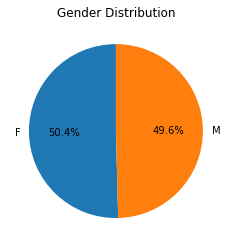

In [15]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively.

#### Product Properties

Text(0.5, 1.0, 'Cost of the Product')

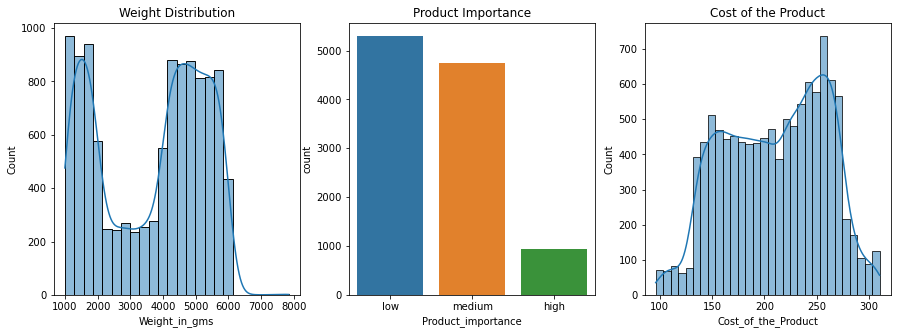

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

These three graphs explain the distribution of product properties - Weight, Cost and Importance in the dataset. Firstly, looking at the weight distribution, we can see that the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges. The second graph is about the product importance, where majority of the products have low or medium importance. The third graph is about the cost of the product. Third graph is about the cost distribution of the products, where there is increased distribution between 150-200 and 225-275 dollars.

From this, I conclude that majority of the products are lighter than 6000 grams, have low or medium importance and costs between 150-275 dollars.

#### Logistics

Text(0.5, 1.0, 'Reached on Time')

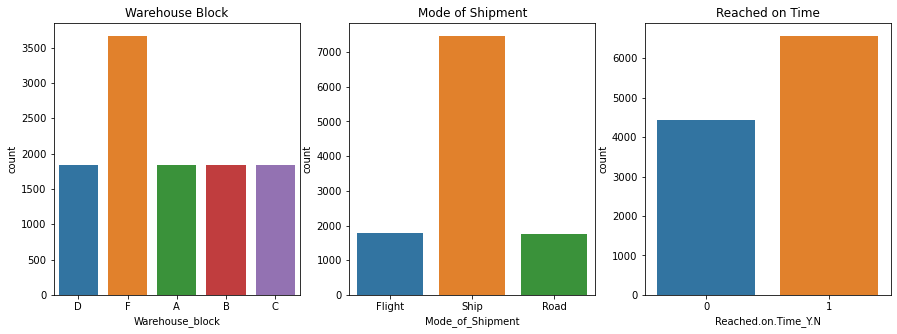

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

#### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

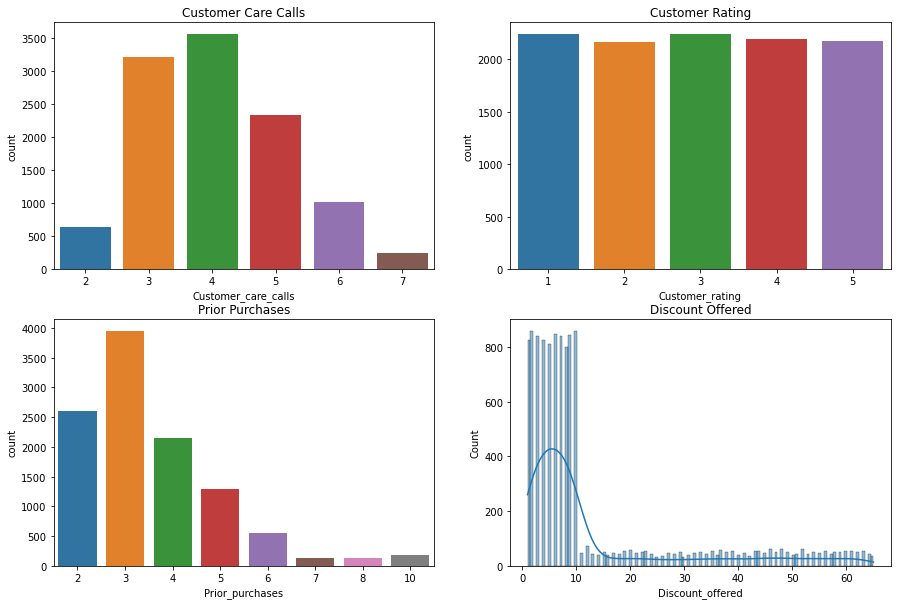

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Gender vs Reached on Time')

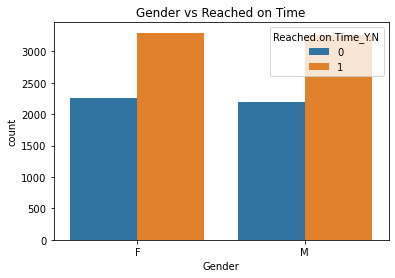

In [19]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

The number of products timely delivered for both the genders is same, which means there is no relation of customer gender and product delivery.

#### Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

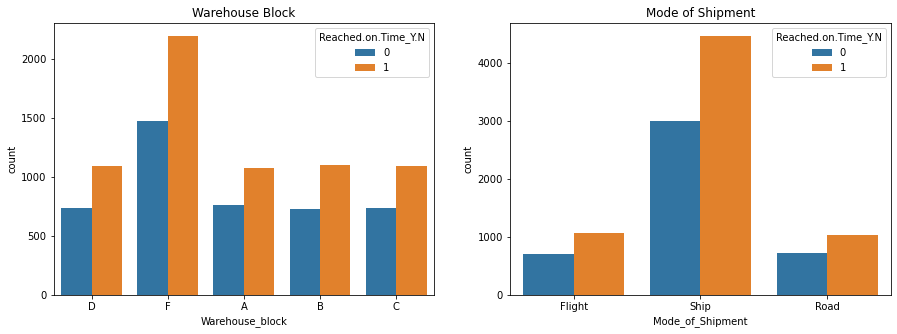

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

#### Customer Experience and Product Delivery

Text(0.5, 1.0, 'Discount Offered')

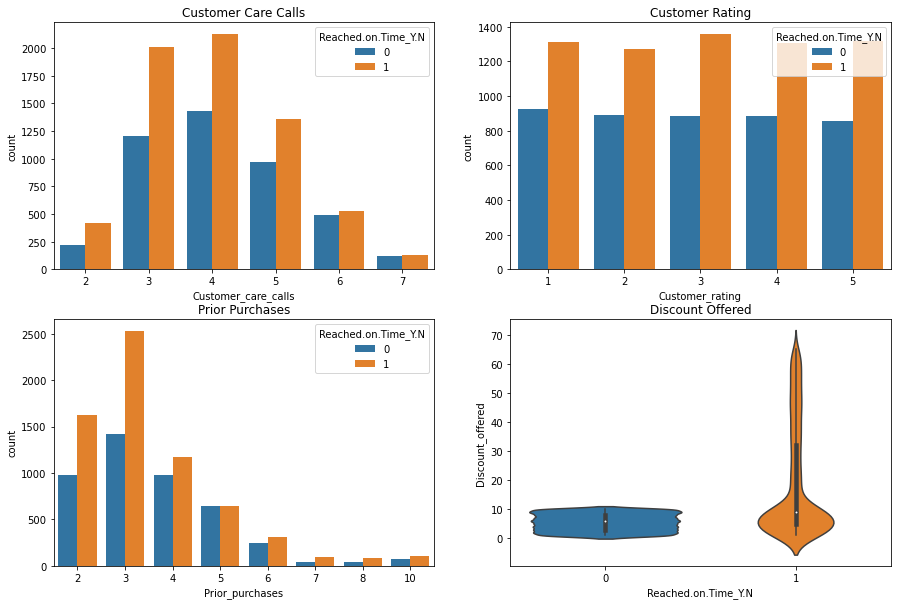

In [21]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

#### Label Encoding the Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


## Correlation Matrix Heatmap

<AxesSubplot:>

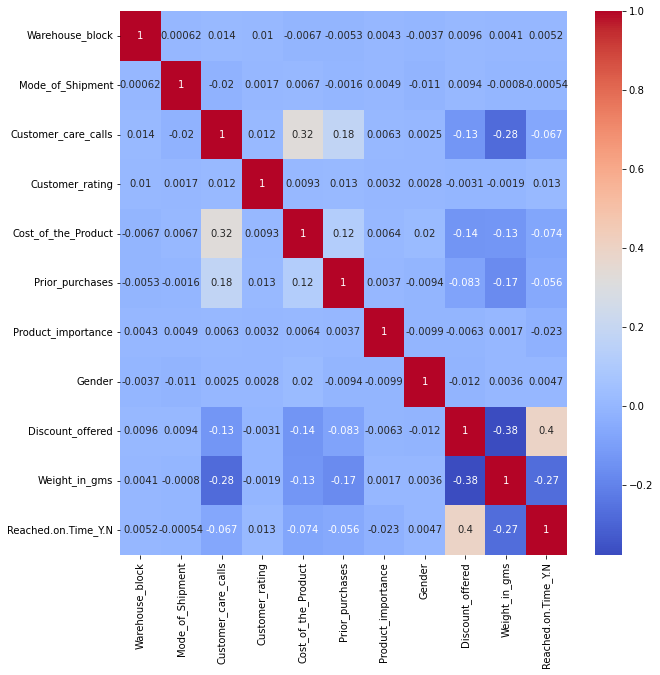

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

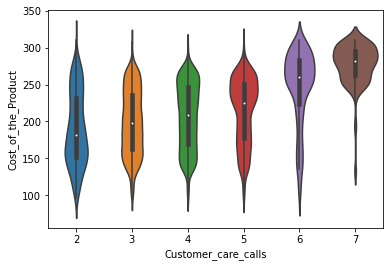

In [24]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Model Building

#### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [27]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [28]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [29]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [30]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

#### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [32]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [33]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [34]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [35]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [37]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
#Training accuracy
lr.score(X_train, y_train)

0.6356404136833731

In [39]:
#predicting the test set results
lr_pred = lr.predict(X_test)

#### K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [41]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
#training accuracy
knn.score(X_train, y_train)

0.7782702579838618

In [43]:
#predicting the test set results
knn_pred = knn.predict(X_test)

## Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

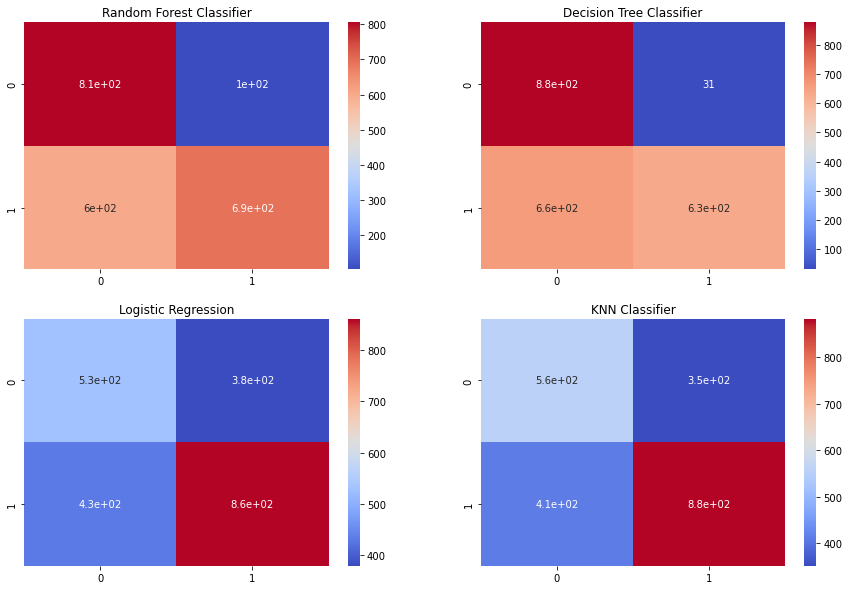

In [45]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

##### Model Comparison

Text(0, 0.5, 'Accuracy')

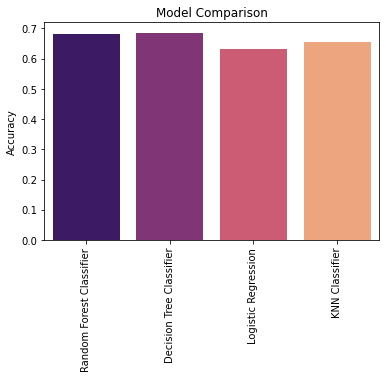

In [46]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

In [ ]:
##### Ad

Text(0, 0.5, 'Discount Offered (%)')

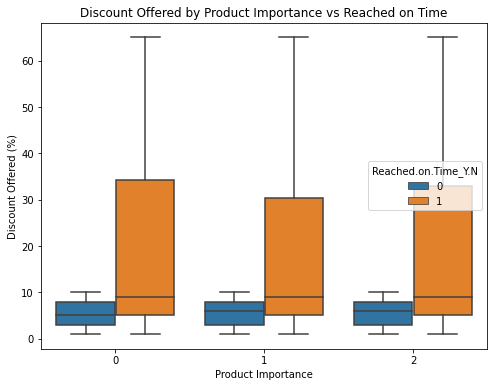

In [47]:
# Box Plot of Discount Offered by Product Importance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', data=df)
plt.title('Discount Offered by Product Importance vs Reached on Time')
plt.xlabel('Product Importance')
plt.ylabel('Discount Offered (%)')

<Figure size 720x432 with 0 Axes>

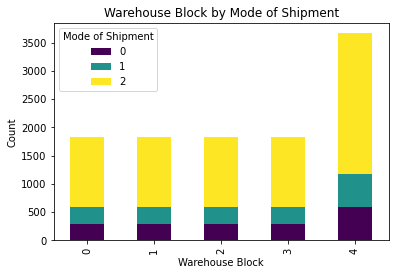

In [48]:
# Stacked Bar Plot of Warehouse Block by Mode of Shipment
plt.figure(figsize=(10, 6))
warehouse_shipment = pd.crosstab(df['Warehouse_block'], df['Mode_of_Shipment'])
warehouse_shipment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Warehouse Block by Mode of Shipment')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.legend(title='Mode of Shipment')

Text(0.5, 1.02, 'Pair Plot of Numerical Features by Delivery Status')

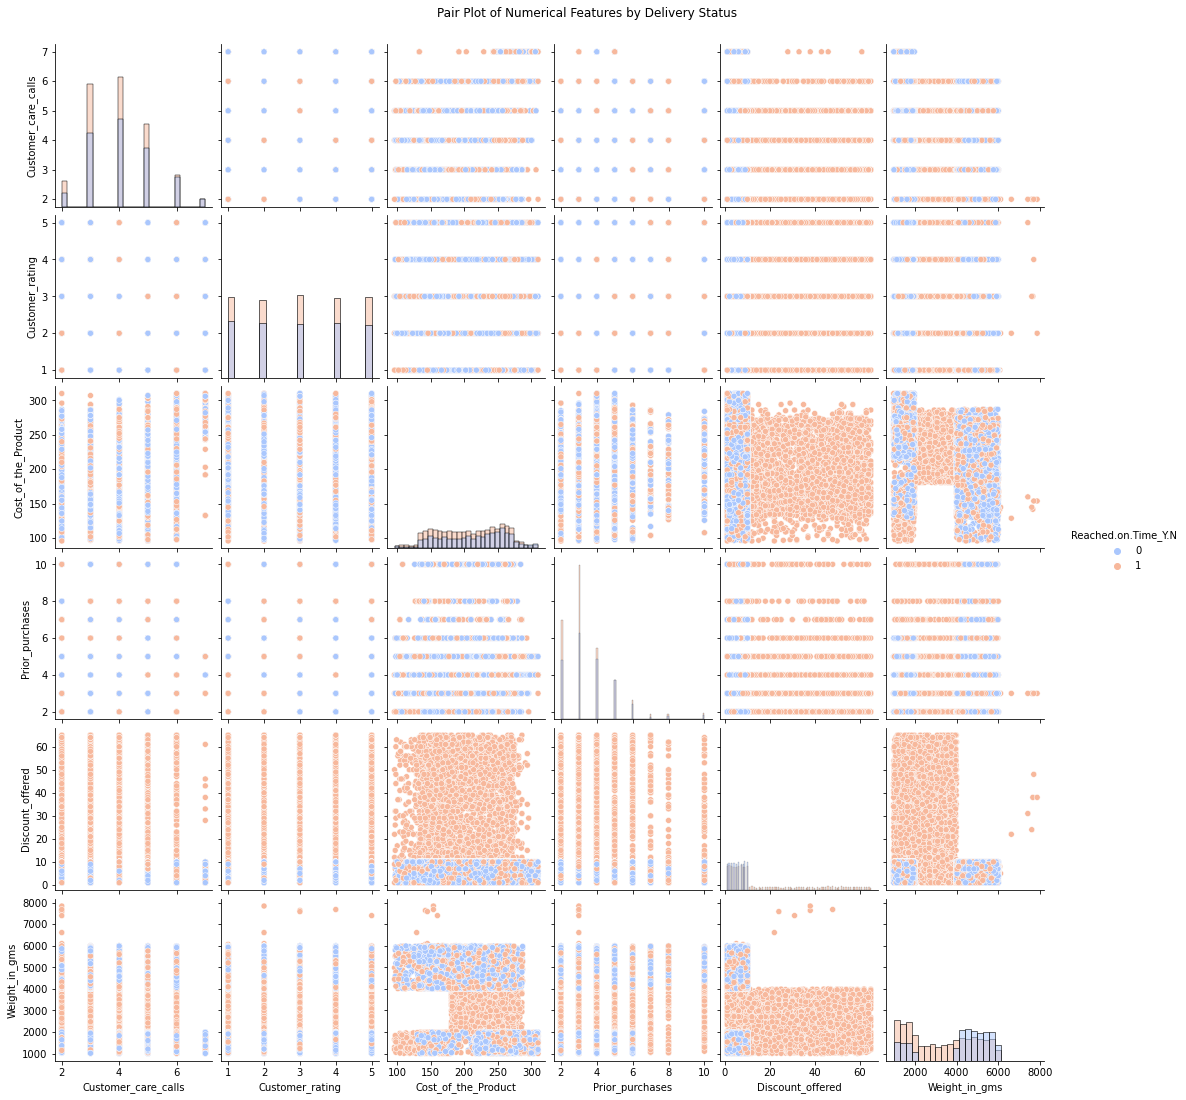

In [49]:
# Pair Plot of Numerical Features
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
sns.pairplot(df[numerical_cols], hue='Reached.on.Time_Y.N', palette='coolwarm', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Features by Delivery Status', y=1.02)